# Security of Big Data Analitics

### Laboratory 07 "Evasion Attacks"

#### Please insert bellow your firstname, lastnema and ID number and run this cell
Mateusz Wiśniewski 148327



The aim of the exercise is to illustrate the effect of evasion attacks. Adversarial example attack performed in the inference phase is the most studied security threat of AI system

During the exercise the secml library will be used. Link to the tutorial:https://github.com/pralab/secml/blob/master/tutorials/08-ImageNet.ipynb



### Evasion Attacks

An evasion attack on the image classifier algorithm can be implemented as follows:

----------------------
#### 1.  Import needed libraries

In [2]:
!pip install secml
import secml
import torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 464.0/464.0 kB 8.3 MB/s eta 0:00:00


--------------------------
#### 2. Load the pretrained model

In this exercise,  a pretrained model from torchvision will be used (ResNet18 model).

In [3]:
from torchvision import models

# Download and cache pretrained model from PyTorch model zoo
model = models.resnet18(pretrained=True)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 84.2MB/s]


In [4]:
import torch
from torch import nn

from secml.data import CDataset
from secml.ml.classifiers import CClassifierPyTorch
from secml.ml.features import CNormalizerMeanStd

# Random seed
torch.manual_seed(0)

criterion = nn.CrossEntropyLoss()
optimizer = None  # the network is pretrained

# imagenet normalization
normalizer = CNormalizerMeanStd(mean=(0.485, 0.456, 0.406),
                                std=(0.229, 0.224, 0.225))

# wrap the model, including the normalizer
clf = CClassifierPyTorch(model=model,
                         loss=criterion,
                         optimizer=optimizer,
                         epochs=10,
                         batch_size=1,
                         input_shape=(3, 224, 224),
                         softmax_outputs=False,
                         preprocess=normalizer,
                         random_state=0,
                         pretrained=True)

2024-11-26 12:59:46,231 - secml.settings - INFO - New `SECML_HOME_DIR` created: /root/secml-data
2024-11-26 12:59:46,231 - secml.settings - INFO - New `SECML_HOME_DIR` created: /root/secml-data


INFO:secml.settings:New `SECML_HOME_DIR` created: /root/secml-data


2024-11-26 12:59:46,239 - secml.settings - INFO - Default configuration file copied to: /root/secml-data/secml.conf
2024-11-26 12:59:46,239 - secml.settings - INFO - Default configuration file copied to: /root/secml-data/secml.conf


INFO:secml.settings:Default configuration file copied to: /root/secml-data/secml.conf


2024-11-26 12:59:46,247 - secml.settings - INFO - New `SECML_DS_DIR` created: /root/secml-data/datasets
2024-11-26 12:59:46,247 - secml.settings - INFO - New `SECML_DS_DIR` created: /root/secml-data/datasets


INFO:secml.settings:New `SECML_DS_DIR` created: /root/secml-data/datasets


2024-11-26 12:59:46,252 - secml.settings - INFO - New `SECML_MODELS_DIR` created: /root/secml-data/models
2024-11-26 12:59:46,252 - secml.settings - INFO - New `SECML_MODELS_DIR` created: /root/secml-data/models


INFO:secml.settings:New `SECML_MODELS_DIR` created: /root/secml-data/models


2024-11-26 12:59:46,257 - secml.settings - INFO - New `SECML_EXP_DIR` created: /root/secml-data/experiments
2024-11-26 12:59:46,257 - secml.settings - INFO - New `SECML_EXP_DIR` created: /root/secml-data/experiments


INFO:secml.settings:New `SECML_EXP_DIR` created: /root/secml-data/experiments


2024-11-26 12:59:46,262 - secml.settings - INFO - New `SECML_LOGS_DIR` created: /root/secml-data/logs
2024-11-26 12:59:46,262 - secml.settings - INFO - New `SECML_LOGS_DIR` created: /root/secml-data/logs


INFO:secml.settings:New `SECML_LOGS_DIR` created: /root/secml-data/logs


2024-11-26 12:59:46,266 - secml.settings - INFO - New `SECML_PYTORCH_DIR` created: /root/secml-data/pytorch-data
2024-11-26 12:59:46,266 - secml.settings - INFO - New `SECML_PYTORCH_DIR` created: /root/secml-data/pytorch-data


INFO:secml.settings:New `SECML_PYTORCH_DIR` created: /root/secml-data/pytorch-data


------------------------
#### 3. Doenload, load and classify an image

Now, a image downloaded from the web will be used to obtain the classification output. We use the PIL and io module for reading the image, requests for getting the image, and matplotlib for visualization.

Plese, download image African_Bush_Elephant.jpg from https://upload.wikimedia.org/wikipedia/commons/3/37/African_Bush_Elephant.jpg and seve it in main directory of Jupiter Notebook

In [8]:
from torchvision import transforms
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
])

from PIL import Image
import requests
import io

# img_path = input("Insert image path:")
!wget https://upload.wikimedia.org/wikipedia/commons/3/37/African_Bush_Elephant.jpg
img_path = 'https://upload.wikimedia.org/wikipedia/commons/3/37/African_Bush_Elephant.jpg'
imga= 'African_Bush_Elephant.jpg'

#r = requests.get(img_path)
img = Image.open(imga)

# apply transform from torchvision
img_t = transform(img)

# convert to CArray
from secml.array import CArray
batch_t = torch.unsqueeze(img_t, 0).view(-1)
batch_c = CArray(batch_t.numpy())

# prediction for the given image
preds = clf.predict(batch_c)

--2024-11-26 13:00:50--  https://upload.wikimedia.org/wikipedia/commons/3/37/African_Bush_Elephant.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4783815 (4.6M) [image/jpeg]
Saving to: ‘African_Bush_Elephant.jpg.1’

African_Bush_Elepha 100%[===================>]   4.56M  16.8MB/s    in 0.3s    

2024-11-26 13:00:50 (16.8 MB/s) - ‘African_Bush_Elephant.jpg.1’ saved [4783815/4783815]



---------------------
#### 4. Load a label

Now, the ImageNet human-readable labels, from a website, has to be load in order to get the string label with the class name. It is possible to display the image along with the predicted label.

https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json


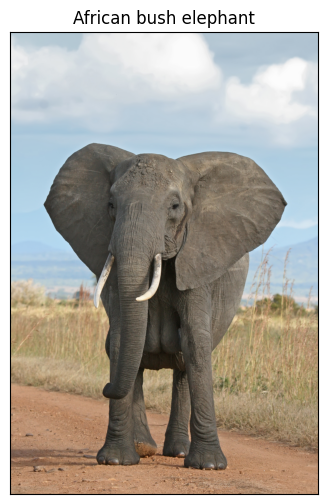

In [12]:
import json
imagenet_labels_path = "https://raw.githubusercontent.com/" \
                       "anishathalye/imagenet-simple-labels/" \
                       "master/imagenet-simple-labels.json"

print(imagenet_labels_path)
r = requests.get(imagenet_labels_path)
labels = json.load(io.StringIO(r.text))
label = preds.item()
predicted_label = labels[label]

from secml.figure import CFigure
# Only required for visualization in notebooks
%matplotlib inline

fig = CFigure()
fig.sp.imshow(img)
fig.sp.xticks([])
fig.sp.yticks([])
fig.sp.title(predicted_label)
fig.show()

-----------------------
#### 5. Run attack

We can create adversarial examples from this image. It is very sipmle, becaouse it will take no more than creating a CAttackEvasionPGDLS object. We should also apply the box constraint with the boundaries for the features lb and ub. Remember that this constraint will project the modified sample in the image space [0, 1], ensuring the adversarial example remains in the feasible space. The constraints are applied in the input space, before the image normalization.

In [10]:
noise_type = 'l2'  # Type of perturbation 'l1' or 'l2'
dmax = 5  # Maximum perturbation
lb, ub = 0.0, 1.0 # Bounds of the attack space. Can be set to `None` for unbounded
y_target = 1  # None if `error-generic` or a class label for `error-specific`

# Should be chosen depending on the optimization problem
solver_params = {
    'eta': 0.01,
    'eta_min': 2.0,
    'max_iter': 100,
    'eps': 1e-3
}

from secml.adv.attacks import CAttackEvasionPGDLS
pgd_ls_attack = CAttackEvasionPGDLS(classifier=clf,
                                    double_init=False,
                                    distance=noise_type,
                                    dmax=dmax,
                                    solver_params=solver_params,
                                    y_target=y_target,
                                    lb=lb, ub=ub)

print("Attack started...")
eva_y_pred, _, eva_adv_ds, _ = pgd_ls_attack.run(batch_c, label)
print("Attack complete!")

adv_label = labels[clf.predict(eva_adv_ds.X).item()]

Attack started...
Attack complete!


#### 6. Checking the effects of the attack carried out

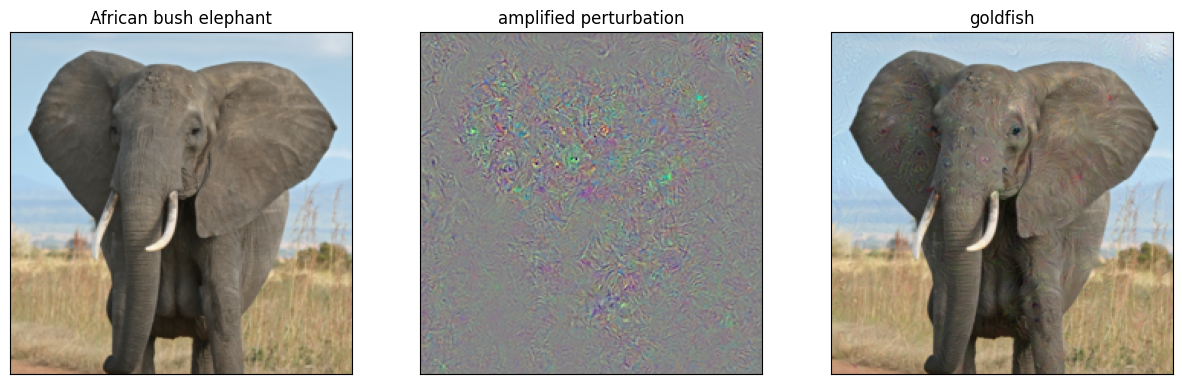

In [21]:
start_img = batch_c
eva_img = eva_adv_ds.X

# normalize perturbation for visualization
diff_img = start_img - eva_img
diff_img -= diff_img.min()
diff_img /= diff_img.max()

import numpy as np
start_img = np.transpose(start_img.tondarray().reshape((3, 224, 224)), (1, 2, 0))
diff_img = np.transpose(diff_img.tondarray().reshape((3, 224, 224)), (1, 2, 0))
eva_img = np.transpose(eva_img.tondarray().reshape((3, 224, 224)), (1, 2, 0))

fig = CFigure(width=15, height=5)
fig.subplot(1, 3, 1)
fig.sp.imshow(start_img)
fig.sp.title(predicted_label)
fig.sp.xticks([])
fig.sp.yticks([])

fig.subplot(1, 3, 2)
fig.sp.imshow(diff_img)
fig.sp.title("amplified perturbation")
fig.sp.xticks([])
fig.sp.yticks([])

fig.subplot(1, 3, 3)
fig.sp.imshow(eva_img)
fig.sp.title(adv_label)
fig.sp.xticks([])
fig.sp.yticks([])

fig.show()

-------------------------
# Exercise

1. Download new image, save it im main directory of studen user and run all cell code again;
Whether the attack was successful with the new image?

2. Downlowad seweral figures and compare results (sucess or not, can you see between origanal images and images after attac?)
    
3. Change the attack parameters (step 5) and check the effects of the attack (run all cell code again).

In [19]:
def single_image(path):
  img_path = path
  imga= path.split("/")[-1]

  #r = requests.get(img_path)
  !wget $img_path
  img = Image.open(imga)

  # apply transform from torchvision
  img_t = transform(img)

  # convert to CArray
  from secml.array import CArray
  batch_t = torch.unsqueeze(img_t, 0).view(-1)
  batch_c = CArray(batch_t.numpy())

  # prediction for the given image
  preds = clf.predict(batch_c)

  label = preds.item()
  predicted_label = labels[label]

  from secml.figure import CFigure
  # Only required for visualization in notebooks
  %matplotlib inline

  fig = CFigure()
  fig.sp.imshow(img)
  fig.sp.xticks([])
  fig.sp.yticks([])
  fig.sp.title(predicted_label)
  fig.show()

In [27]:
def single_image_with_attack(path):
  img_path = path
  imga= path.split("/")[-1]

  #r = requests.get(img_path)
  img = Image.open(imga)

  # apply transform from torchvision
  img_t = transform(img)

  # convert to CArray
  from secml.array import CArray
  batch_t = torch.unsqueeze(img_t, 0).view(-1)
  batch_c = CArray(batch_t.numpy())

  # prediction for the given image
  preds = clf.predict(batch_c)

  label = preds.item()
  predicted_label = labels[label]

  from secml.figure import CFigure
  # Only required for visualization in notebooks
  %matplotlib inline

  noise_type = 'l2'  # Type of perturbation 'l1' or 'l2'
  dmax = 5  # Maximum perturbation
  lb, ub = 0.0, 1.0 # Bounds of the attack space. Can be set to `None` for unbounded
  y_target = 1  # None if `error-generic` or a class label for `error-specific`

  # Should be chosen depending on the optimization problem
  solver_params = {
      'eta': 0.01,
      'eta_min': 2.0,
      'max_iter': 100,
      'eps': 1e-3
  }

  from secml.adv.attacks import CAttackEvasionPGDLS
  pgd_ls_attack = CAttackEvasionPGDLS(classifier=clf,
                                      double_init=False,
                                      distance=noise_type,
                                      dmax=dmax,
                                      solver_params=solver_params,
                                      y_target=y_target,
                                      lb=lb, ub=ub)

  print("Attack started...")
  eva_y_pred, _, eva_adv_ds, _ = pgd_ls_attack.run(batch_c, label)
  print("Attack complete!")

  adv_label = labels[clf.predict(eva_adv_ds.X).item()]

  start_img = batch_c
  eva_img = eva_adv_ds.X

  # normalize perturbation for visualization
  diff_img = start_img - eva_img
  diff_img -= diff_img.min()
  diff_img /= diff_img.max()

  import numpy as np
  start_img = np.transpose(start_img.tondarray().reshape((3, 224, 224)), (1, 2, 0))
  diff_img = np.transpose(diff_img.tondarray().reshape((3, 224, 224)), (1, 2, 0))
  eva_img = np.transpose(eva_img.tondarray().reshape((3, 224, 224)), (1, 2, 0))

  fig = CFigure(width=15, height=5)
  fig.subplot(1, 3, 1)
  fig.sp.imshow(start_img)
  fig.sp.title(predicted_label)
  fig.sp.xticks([])
  fig.sp.yticks([])

  fig.subplot(1, 3, 2)
  fig.sp.imshow(diff_img)
  fig.sp.title("amplified perturbation")
  fig.sp.xticks([])
  fig.sp.yticks([])

  fig.subplot(1, 3, 3)
  fig.sp.imshow(eva_img)
  fig.sp.title(adv_label)
  fig.sp.xticks([])
  fig.sp.yticks([])

  fig.show()

Tarantula
--2024-11-26 13:12:55--  https://upload.wikimedia.org/wikipedia/commons/thumb/9/94/Brachypelma_vagans_p1.jpg/1280px-Brachypelma_vagans_p1.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 163352 (160K) [image/jpeg]
Saving to: ‘1280px-Brachypelma_vagans_p1.jpg’

1280px-Brachypelma_ 100%[===================>] 159.52K  --.-KB/s    in 0.08s   

2024-11-26 13:12:56 (1.99 MB/s) - ‘1280px-Brachypelma_vagans_p1.jpg’ saved [163352/163352]



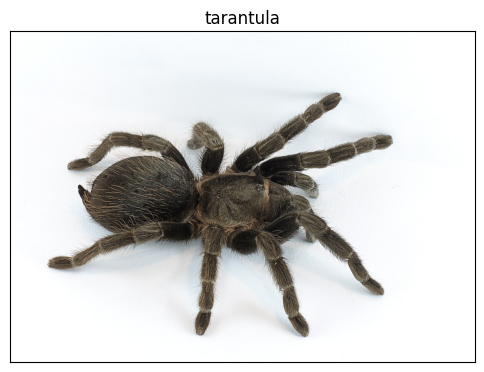

Espresso machine
--2024-11-26 13:12:56--  https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/Krups_Vivo_F880_home_espresso_maker.jpg/1024px-Krups_Vivo_F880_home_espresso_maker.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112898 (110K) [image/jpeg]
Saving to: ‘1024px-Krups_Vivo_F880_home_espresso_maker.jpg’

1024px-Krups_Vivo_F 100%[===================>] 110.25K  --.-KB/s    in 0.06s   

2024-11-26 13:12:56 (1.68 MB/s) - ‘1024px-Krups_Vivo_F880_home_espresso_maker.jpg’ saved [112898/112898]



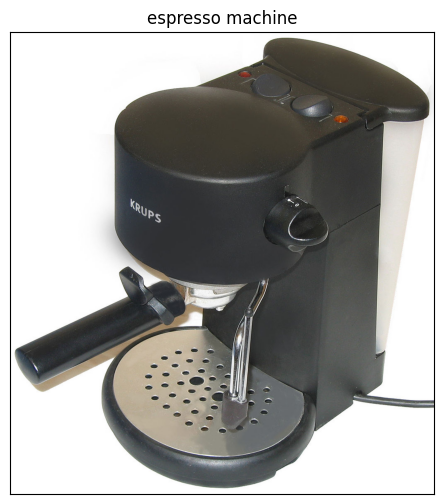

Volcano
--2024-11-26 13:12:57--  https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Capulin_1980_tde00005.jpg/1024px-Capulin_1980_tde00005.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 237174 (232K) [image/jpeg]
Saving to: ‘1024px-Capulin_1980_tde00005.jpg’

1024px-Capulin_1980 100%[===================>] 231.62K  --.-KB/s    in 0.1s    

2024-11-26 13:12:57 (2.37 MB/s) - ‘1024px-Capulin_1980_tde00005.jpg’ saved [237174/237174]



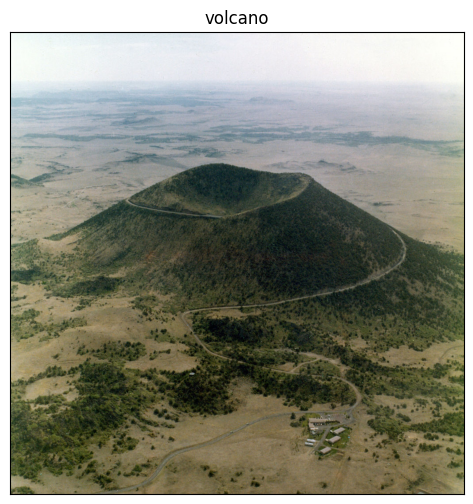

In [20]:
tarantula_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/9/94/Brachypelma_vagans_p1.jpg/1280px-Brachypelma_vagans_p1.jpg"
espresso_machine_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/Krups_Vivo_F880_home_espresso_maker.jpg/1024px-Krups_Vivo_F880_home_espresso_maker.jpg"
volcano_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Capulin_1980_tde00005.jpg/1024px-Capulin_1980_tde00005.jpg"

print("Tarantula")
single_image(tarantula_url)
print("Espresso machine")
single_image(espresso_machine_url)
print("Volcano")
single_image(volcano_url)


Tarantula
Attack started...


Attack complete!


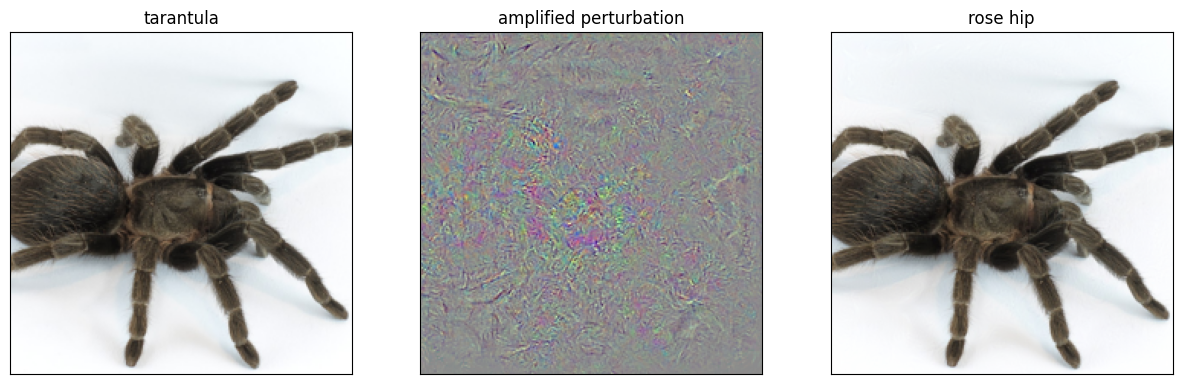

Espresso machine
Attack started...
Attack complete!


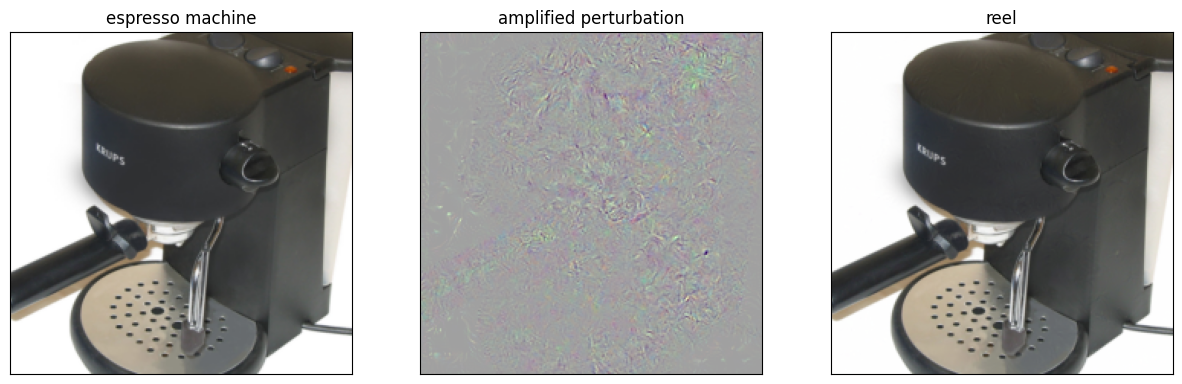

Volcano
Attack started...
Attack complete!


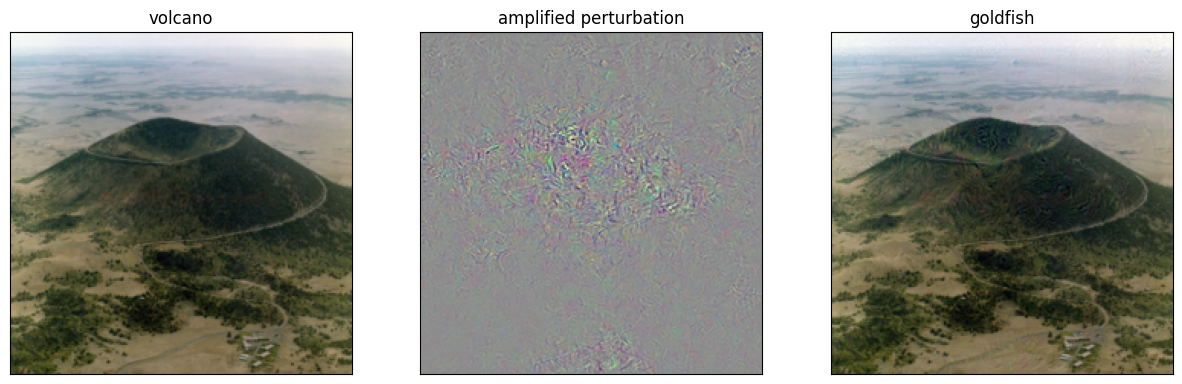

In [25]:
# Attacks
print("Tarantula")
single_image_with_attack(tarantula_url)
print("Espresso machine")
single_image_with_attack(espresso_machine_url)
print("Volcano")
single_image_with_attack(volcano_url)

your answers, conclusions (if not active click twice):


With changed parameters
Attack started...
Attack complete!


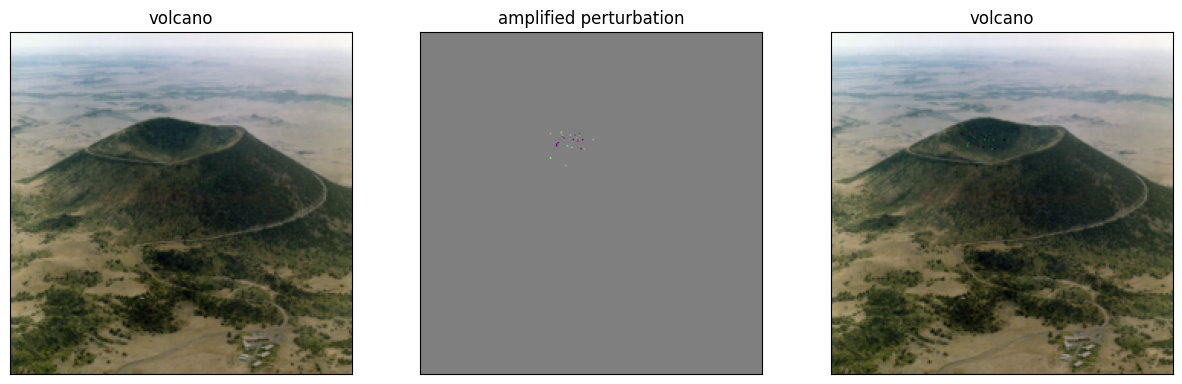

In [28]:
print("With changed parameters")
single_image_with_attack(volcano_url)



  Download new image, save it im main directory of studen user and run all cell code again; Whether the attack was successful with the new image?

  Downlowad seweral figures and compare results (sucess or not, can you see between origanal images and images after attac?)

  Change the attack parameters (step 5) and check the effects of the attack (run all cell code again).


### Answers
1. The attack was successful with every new image.
2. No, the perturbations are not visible to naked eye.
3. Default values seem to be the best ones for this attack.

The project "Cyber Security for the European University EUNICE", implemented under the National Academic Exchange Agency's Strategic Partnerships Programme. Implemented in cooperation between the Poznan University of Technology and the University of Catania, University of Mons, and Brandenburg University of Technology.


In [31]:
# Converting to HTML on Google Colab
%%shell
jupyter nbconvert --to html 148327_SBDA_07_02.ipynb

[NbConvertApp] Converting notebook 148327_SBDA_07_02.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 9 image(s).
[NbConvertApp] Writing 4828082 bytes to 148327_SBDA_07_02.html
